<h2>UMELÉ NEURÓNOVÉ SIETE</h2>

In [1]:
# Importing the libraries
import numpy as np
import tensorflow as tf


tf.__version__

'2.10.0'

Importujeme náš dataset. Prvých 27 stĺpcov sú nezávislé premenné a posledný stĺpec je závislá premenná. Vytvoríme maticu <em>X</em> a vektor <em>y</em>:

In [2]:
import pandas as pd
from utils.prune_empty import prune_empty
dataset = prune_empty("output.csv")

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(f"{X.shape=}")
print(f"{y.shape=}")

X.shape=(1042, 28)
y.shape=(1042,)


Vytvoríme one hot encoded maticu závislej premennej <em>y</em>:

In [3]:

from keras.utils import to_categorical

y = to_categorical(y, num_classes=10)
print(f"{y.shape=}")

y.shape=(1042, 10)


Riadok s rozdeľovaním dát na trénovacie a testovacie:

In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

dropout, layers, drop_val, epochs, early_stop, test_size = False, [24,16], 0.2, 384, False, 0.1 # placeholder

def usesettings(d: dict):
    globals().update(d)
    print(f"Using settings: {d}")
    
best = {"dropout":False,"drop_val":0.2, "early_stop":False, "layers":[24,16], "epochs":512, "test_size":0.15} # 0.955
bestplus = {"dropout":True,"drop_val":0.25, "early_stop":True, "layers":[24,16], "epochs":512, "test_size":0.15} # 0.938
bigger = {"dropout":True,"drop_val":0.2, "early_stop":True, "layers":[32,24,16], "epochs":768, "test_size":0.15} # 0.90
smol = {"dropout":False,"drop_val":0.2, "early_stop":True, "layers":[16], "epochs":256, "test_size":0.2} # 0.82
smol2 = {"dropout":False,"drop_val":0.2, "early_stop":True, "layers":[12,6], "epochs":384, "test_size":0.2} # 0.72

usesettings(best)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 0)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Using settings: {'dropout': False, 'drop_val': 0.2, 'early_stop': False, 'layers': [24, 16], 'epochs': 512, 'test_size': 0.15}
Shape of X_train: (885, 28)
Shape of X_test: (157, 28)
Shape of y_train: (885, 10)
Shape of y_test: (157, 10)


Inicializujeme neurónovú sieť:

In [5]:
# Initialising the ANN
ann = tf.keras.models.Sequential()

Pridáme prvú vrstvu, teda vstupnú vrstvu, kde počet neurónov bude taký, aký máme počet našich príznakov, teda nezávislých premenných, čo vidíme v <em>input dimension</em> nastavených na 27. Typ vrstvy je <em>Dense</em>, čo je plne prepojená vrstva. Ako aktivačnú funkciu sme si vybrali <strong><em>relu</em></strong>, ktorá je na vstupnú vrstvu vhodná.

In [6]:
from keras.layers import Dropout

# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=layers[0], activation='relu', input_dim=28))
if dropout:
    ann.add(Dropout(drop_val))

Pridáme ďalšie skryté vrstvy:

In [7]:
# Adding hidden layers
for l in layers[1:]:
    ann.add(tf.keras.layers.Dense(units=l, activation='relu'))
    if dropout:
        ann.add(Dropout(drop_val))
    
#out layer
ann.add(tf.keras.layers.Dense(units=10, activation='softmax'))

Pridáme výstupnú vrstvu, kde počet výstupných neurónov bude 10, nakoľko výstupná vrstva nám bude určovať, ktorú číslicu sme nakreslili. Aktivačná funkcia je do výstupnej funkcie vhodná <em><strong>softmax</em></strong>, keďže máme viac kategórií.

Neurónovú sieť skompilujeme. Loss nastavujeme na <em><strong>categorical_crossentropy</em></strong>, nakoľko máme viac kategórií.

In [8]:
# Compiling the ANN
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

Neurónovú sieť natrénujeme, počet epoch nastavíme na 1000. Nezabudnime, že ak chceme skúšať sieť s inými parametrami, tak musíme zmazať všetky dáta v pamäti, ktoré sa týkajú neurónovej siete a spustiť jej inicializáciu znova, nakoľko to vyzerá, že JupyterLab si pamätá predošlé natrénovanie:

In [9]:
# Fitting the ANN to the Training set
ann1 = ann.fit(X_train, y_train, validation_data = (X_test, y_test),  batch_size = 8192, epochs = epochs, callbacks=[early_stopping] if early_stop else None)

Epoch 1/512
1/1 [==============================] - 2s 2s/step - loss: 2.3511 - accuracy: 0.1006 - val_loss: 2.3363 - val_accuracy: 0.1210
Epoch 2/512
1/1 [==============================] - 0s 92ms/step - loss: 2.3430 - accuracy: 0.1017 - val_loss: 2.3292 - val_accuracy: 0.1210
Epoch 3/512
1/1 [==============================] - 0s 57ms/step - loss: 2.3352 - accuracy: 0.1040 - val_loss: 2.3223 - val_accuracy: 0.1274
Epoch 4/512
1/1 [==============================] - 0s 86ms/step - loss: 2.3276 - accuracy: 0.1040 - val_loss: 2.3156 - val_accuracy: 0.1274
Epoch 5/512
1/1 [==============================] - 0s 71ms/step - loss: 2.3202 - accuracy: 0.1051 - val_loss: 2.3091 - val_accuracy: 0.1274
Epoch 6/512
1/1 [==============================] - 0s 79ms/step - loss: 2.3131 - accuracy: 0.1085 - val_loss: 2.3027 - val_accuracy: 0.1274
Epoch 7/512
1/1 [==============================] - 0s 75ms/step - loss: 2.3062 - accuracy: 0.1096 - val_loss: 2.2964 - val_accuracy: 0.1274
Epoch 8/512
1/1 [=====

Zobrazíme si priebeh trénovania neurónovej siete pomocou zobrazenia presnosti. <em>Accuracy</em> je presnosť pre trénovaciu množinu a <em>val_accuracy</em> je presnosť pre testovaciu (validačnú) množinu. Ak je presnosť pre trénovaciu množinu veľmi vysoká, avšak nízka pre testovaciu, znamená to, že sieť je pretrénovaná (<strong>overfitting</strong>).

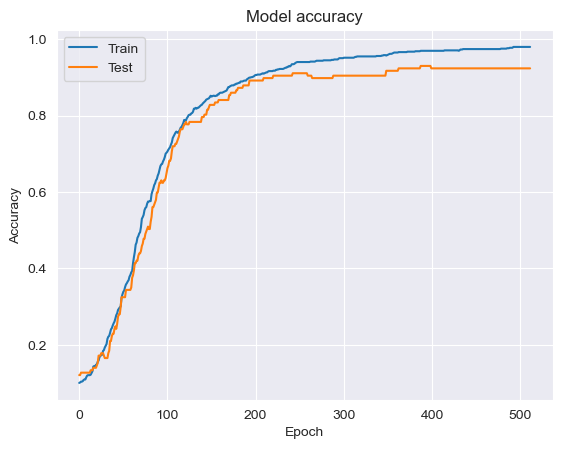

In [10]:
import matplotlib.pyplot as plt
plt.plot(ann1.history['accuracy'])
plt.plot(ann1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Zobrazíme si priebeh trénovania neurónovej siete pomocou zobrazenia loss:

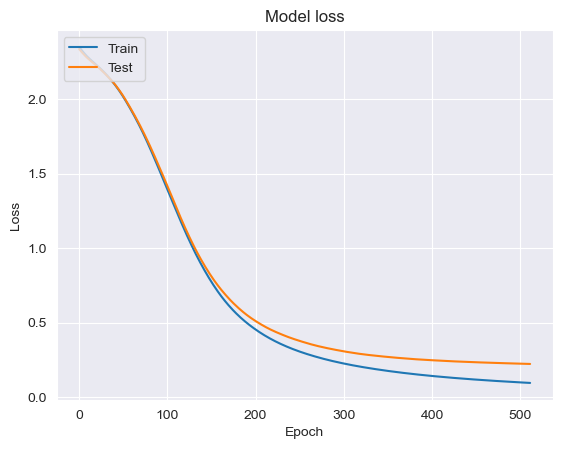

In [11]:
plt.plot(ann1.history['loss'])
plt.plot(ann1.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()


Skúsme predikovať výsledok, teda či odíde z banky človek, ktorý má nasledovné parametre:<br /><img src="http://mvi.mechatronika.cool/sites/default/files/obrazky/obrazok_cv4_11.png" />

Toto realizujeme pomocou kódu:

In [12]:
try:
    input_data = np.array([[1,1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0]])

    # Predict the class
    prediction = ann.predict(input_data)
    
    # Convert the prediction to a class label
    predicted_class = np.argmax(prediction, axis=1)
    
    readable = [float(f"{num:.3f}") for num in prediction[0]]
    
    # print(f"One-hot encoded prediction: {prediction}")
    print(f"One-hot encoded prediction confidences: {readable}")
    print(f"Predicted class: {predicted_class[0]}")
except Exception as e:
    print(e)

1/1 [==============================] - 0s 139ms/step
One-hot encoded prediction confidences: [0.0, 0.0, 0.003, 0.002, 0.0, 0.0, 0.0, 0.994, 0.0, 0.0]
Predicted class: 7


Ideme predikovať výsledky na základe testovacích dát. Predposledný riadok nám urobí to, že výsledky väčšie ako 0.5 označí ako <strong>True</strong> a ostatné ako <strong>False</strong>.

In [13]:
# Predicting the Test set results
y_pred = ann.predict(X_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)


5/5 [==============================] - 0s 2ms/step


Znovu vyrobíme confusion matrix. Kód potom spustíme a pozrieme obsah confusion matrix, ktorej obsahu sme sa naučili rozumieť pri logistickej regresii.

In [14]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score

# Compute confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
# print(cm)

# Compute accuracy score
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(accuracy)

0.9235668789808917


Program je hotový. Prečítame si a <strong>splníme úlohu</strong> na konci nášho dokumentu k cvičeniu.

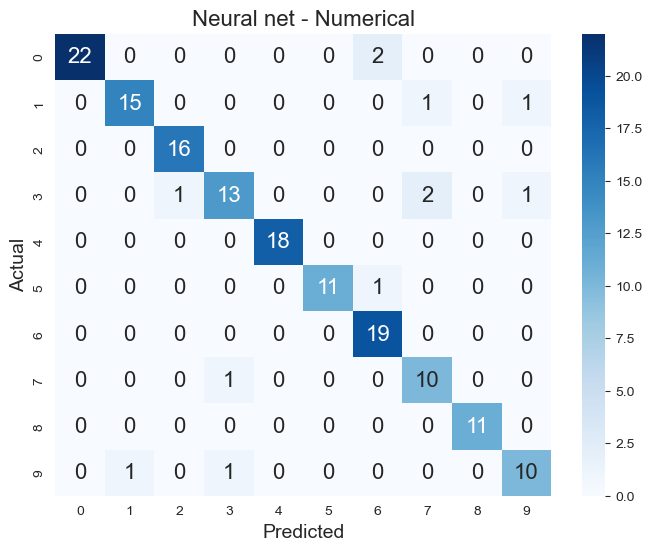

0.9235668789808917


In [15]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(0,10), yticklabels=range(0,10), annot_kws={"size": 16})
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Neural net - Numerical', fontsize=16)
plt.show()
print(accuracy)